<a href="https://colab.research.google.com/github/ilanmoshe52/Final_Project/blob/main/wavlets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pywt
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [5]:
print(pywt.Modes.modes)

['zero', 'constant', 'symmetric', 'periodic', 'smooth', 'periodization', 'reflect', 'antisymmetric', 'antireflect']


In [9]:
(a, d) = pywt.dwt([1,2,3,4,5,6], 'db2', 'smooth')
(a, d) = pywt.dwt([1,2,3,4,5,6], pywt.Wavelet('db2'), pywt.Modes.smooth)
a,d

(array([-0.51763809,  2.31078903,  5.13921616,  7.96764328]),
 array([0.00000000e+00, 1.66533454e-16, 3.33066907e-16, 2.22044605e-16]))

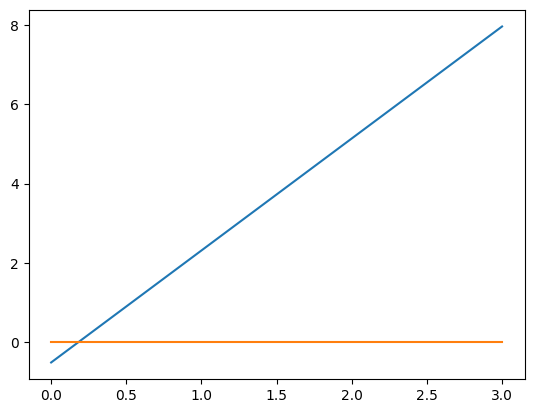

In [11]:
import matplotlib.pyplot as plt
plt.plot(a)
plt.plot(d)

In [18]:
from pywt import wavedec
coeffs = wavedec([1,2,3,4,5,6,7,8], 'db1', level=2)
coeffs
#cA2, cD2, cD1 = coeffs
#cA2, cD2, cD1

[array([ 5., 13.]),
 array([-2., -2.]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]

In [20]:
# Generate sample data for classification
import numpy as np

np.random.seed(0)
num_samples = 32
t = np.linspace(0, 1, num_samples, endpoint=False)
class_1_signal = np.sin(2 * np.pi * 5 * t)  # Class 1: Sine wave
class_2_signal = np.sin(2 * np.pi * 10 * t)  # Class 2: Higher frequency sine wave

# Combine signals with noise
noise_level = 0.5
y = class_1_signal + np.random.randn(num_samples) * noise_level

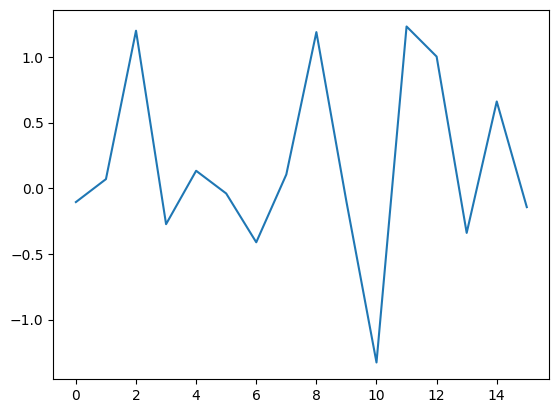

In [24]:
coeffs = wavedec(y, 'db1', level=2)
plt.plot(coeffs[2])

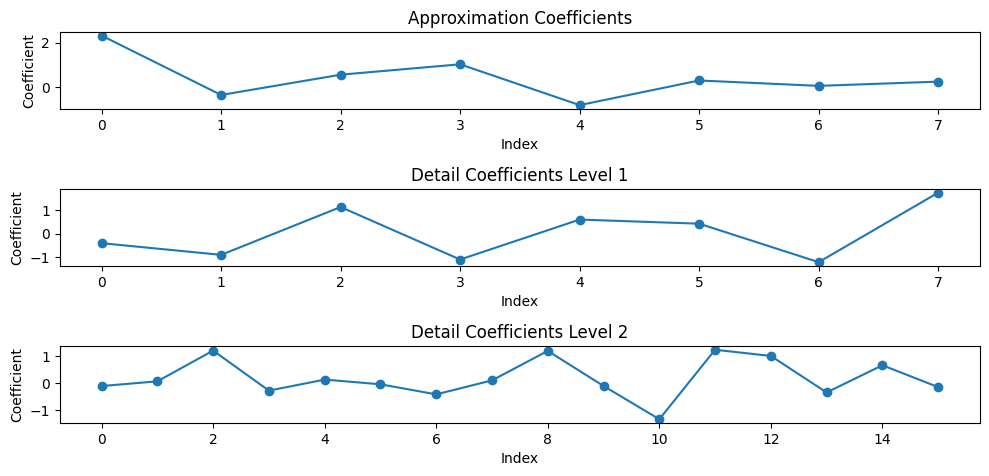

In [25]:
# Plot the coefficients
plt.figure(figsize=(10, 6))

# Plot approximation coefficients
plt.subplot(len(coeffs) + 1, 1, 1)
plt.plot(np.arange(len(coeffs[0])), coeffs[0], marker='o', linestyle='-')
plt.title('Approximation Coefficients')
plt.xlabel('Index')
plt.ylabel('Coefficient')

# Plot detail coefficients
for i in range(1, len(coeffs)):
    plt.subplot(len(coeffs) + 1, 1, i + 1)
    plt.plot(np.arange(len(coeffs[i])), coeffs[i], marker='o', linestyle='-')
    plt.title(f'Detail Coefficients Level {i}')
    plt.xlabel('Index')
    plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()

In [1]:
pip install sounddevice

In [11]:
from skimage.restoration import denoise_wavelet
import pywt
import numpy as np
import matplotlib.pyplot as plt


(1024,)

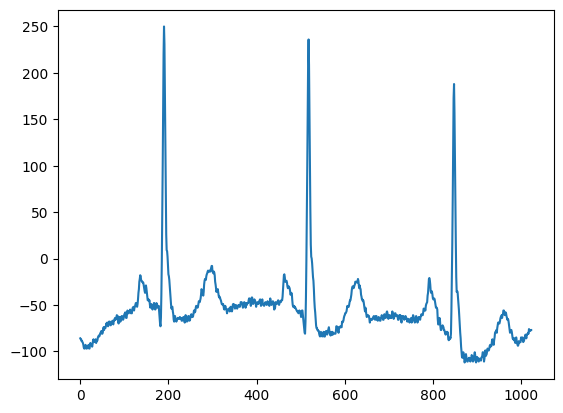

In [18]:
x = pywt.data.ecg()
plt.plot(x)
x.shape

In [21]:
noise_level = 5
noise = np.random.randn(x.shape[0]) * noise_level
y = x + noise

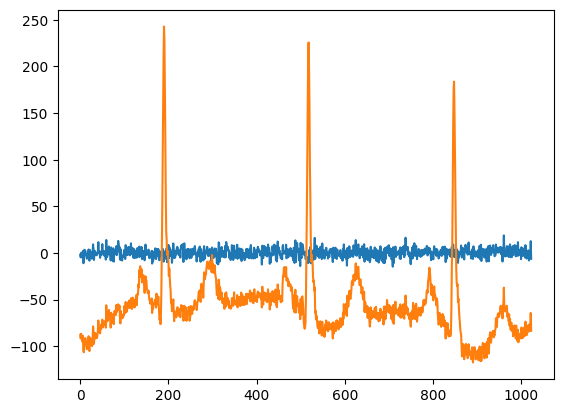

In [22]:
plt.plot(noise)
plt.plot(y)

In [23]:
y_denoise = denoise_wavelet(y,wavelet = 'sym8')

(1024,)

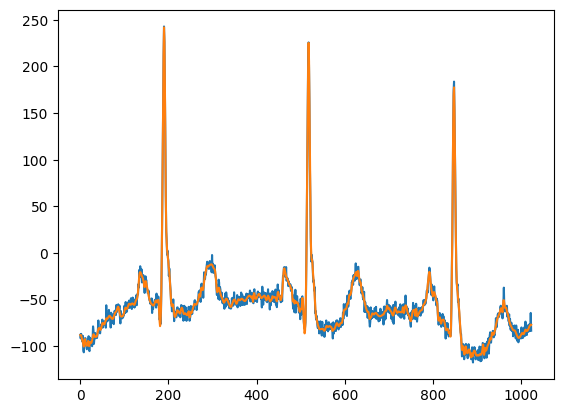

In [27]:
plt.plot(y)
plt.plot(y_denoise )
y_denoise.shape